In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pickle
from scipy.sparse import csr_matrix, hstack
from pandas import DatetimeIndex as ts
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split

In [2]:
train_data = pd.read_csv('C:\Files\\train_sessions.csv',index_col='session_id')
test_data = pd.read_csv('C:\Files\\test_sessions.csv', index_col='session_id')
combine = [train_data, test_data]
times = ['time%s' % i for i in range(1,11)]
train_data[times] = train_data[times].apply(pd.to_datetime)
test_data[times] = test_data[times].apply(pd.to_datetime)

In [3]:
with open('C:\Files\\site_dic.pkl', 'rb') as sitw:
    site = pickle.load(sitw)
site_df = pd.DataFrame(list(site.keys()),index = list(site.values()),columns = ['site'])
site_df
sites = ['site%s' % i for i in range(1,11)]

In [4]:
train_data = train_data.sort_values(by = 'time1')
test_data = test_data.sort_values(by = 'time1')
idx = train_data.shape[0]
full_df = pd.concat([train_data.drop('target',axis = 1),test_data])

In [5]:
train_data.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [6]:
full_df_sites = full_df[sites]
target = train_data['target']

In [7]:
full_df_sites = full_df_sites.fillna(0).astype(int)

In [8]:
sites_flatten = full_df_sites.values.flatten()

In [9]:
sites_flatten_csr = csr_matrix(([1]*sites_flatten.shape[0],sites_flatten,range(0,sites_flatten.shape[0]+10,10)))[:, 1:] 
sites_flatten_csr.shape 
X_train = sites_flatten_csr[:idx] 
X_test = sites_flatten_csr[idx:] 

sites_flatten_csr = csr_matrix(([1]*sites_flatten.shape[0],sites_flatten,range(0,sites_flatten.shape[0]+10,10)))[:, 1:]
sites_flatten_csr.shape
X_train = sites_flatten_csr[:idx]
X_test = sites_flatten_cs  

In [10]:
def Logreg(X,y,C=1.0,size = 0.9,random_seed = 17):
    len_df = int(size * X.shape[0])
    x_train = X[:len_df,:]
    x_test =  X[len_df:,:]
    y_train = y[:len_df]
    y_test  = y[len_df:]
    logreg = LogisticRegression(C = C,n_jobs=-1,random_state = random_seed)
    logreg.fit(x_train,y_train)
    val_pred = logreg.predict_proba(x_test)[:,1]
    return roc_auc_score(y_test,val_pred)

In [11]:
Logreg(X_train,target)

0.919794651774188

In [12]:
logit = LogisticRegression(n_jobs=-1,random_state = 17)
logit.fit(X_train,target)
val_pred = logit.predict_proba(X_test)[:,1]

In [13]:
sub_data = pd.DataFrame(data = val_pred,index = range(1,X_test.shape[0]+1),columns = ['target'])

In [14]:
sub_data.to_csv('C:\Files\\predicted.csv', index_label = 'session_id', header = True)

новый признак

In [15]:
new_feat_train = pd.DataFrame(index = train_data.index)
new_feat_test = pd.DataFrame(index = test_data.index) #создаем для новых признаков отдельные дф

In [16]:
new_feat_train['date'] = train_data['time1'].apply(lambda dt: int(str(dt.year)+str(dt.month))) #задаем новые признаки, можем применять к данным операции год и месяц без дататайм индекса , так как там хранятся дататайм признаки
new_feat_test['date'] = test_data['time1'].apply(lambda dt: int(str(dt.year)+str(dt.month))) #осталось промасштабировать признак - значения в данных больше значений остальных параметров.

In [17]:
scaler = StandardScaler()
scaler.fit(new_feat_train[['date']].values.reshape(-1,1))

new_feat_train['date_scaled'] = scaler.transform(new_feat_train[['date']].values.reshape(-1,1))
new_feat_test['date_scaled'] = scaler.transform(new_feat_test[['date']].values.reshape(-1,1))

In [18]:
X_train_new = csr_matrix(hstack([X_train,new_feat_train['date_scaled'].values.reshape(-1,1)]))

In [19]:
train_data['len'] = ((train_data.count(axis = 1) -1)/2).astype(int)
test_data['len'] = ((test_data.count(axis = 1) -1)/2).astype(int)

In [20]:
start_hour_train = pd.DataFrame(index = train_data.index)
start_hour_test = pd.DataFrame(index = test_data.index)

In [21]:
start_hour_train['start_hour'] = train_data['time1'].apply(lambda h: h.hour)
start_hour_train['morning'] = train_data['time1'].apply(lambda h: int(6<=h.hour<12))
start_hour_train['mid'] = train_data['time1'].apply(lambda h: int(12<=h.hour<18))
start_hour_train['ve4er'] = train_data['time1'].apply(lambda h: int(19<=h.hour<=23))
start_hour_train['night'] = train_data['time1'].apply(lambda h: int(0<=h.hour<6))
start_hour_train['weekday'] = train_data['time1'].apply(lambda dt: int(str(dt.weekday())))
start_hour_train['len_session'] = train_data['len']
start_hour_test['start_hour'] = test_data['time1'].apply(lambda h: h.hour)
start_hour_test['morning'] = test_data['time1'].apply(lambda h: int(6<=h.hour<12))
start_hour_test['mid'] = test_data['time1'].apply(lambda h: int(12<=h.hour<18))
start_hour_test['ve4er'] = test_data['time1'].apply(lambda h: int(19<=h.hour<=23))
start_hour_test['night'] = test_data['time1'].apply(lambda h: int(0<=h.hour<6))
start_hour_test['weekday'] = test_data['time1'].apply(lambda dt: int(str(dt.weekday())))
start_hour_test['len_session'] = test_data['len']




In [22]:
start_hour_train['start_hour_1'] = (start_hour_train['start_hour'].isin([8,9,10,11,13,14,15])).astype(int)
start_hour_train['start_hour_2'] = (start_hour_train['start_hour'].isin([16,17])).astype(int)
start_hour_train['start_hour_3'] = (start_hour_train['start_hour'].isin([7,12,18,19,20,21,22,23])).astype(int)

In [23]:
X_train_new2 = csr_matrix(hstack([X_train_new,start_hour_train[['morning','len_session','mid','ve4er','night','len_session','start_hour_1','start_hour_2','start_hour_3']]]))

In [24]:
train_data['time1'].apply(lambda dt: int(str(dt.weekday())))

session_id
21669     5
54843     5
77292     5
114021    5
146670    5
         ..
12224     2
164438    2
12221     2
156968    2
204762    2
Name: time1, Length: 253561, dtype: int64

In [25]:
train_data.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site7,time7,site8,time8,site9,time9,site10,time10,target,len
session_id,,,,,,,,,,,,,,,,,,,,,
21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,NaT,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,2
54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,NaT,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,4
77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:16,...,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0,10
114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,2013-01-12 08:50:18,...,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0,10
146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,2013-01-12 08:50:21,...,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0,10


<Axes: xlabel='weekday', ylabel='Count'>

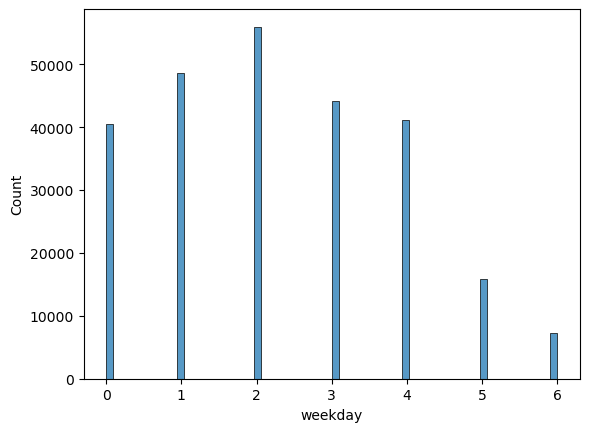

In [26]:
sns.histplot(train_data[train_data.target == 1], x = start_hour_train.weekday)

In [27]:
Logreg(X_train_new,target)

0.9195123685345064

In [28]:
#Добавить еще признаков - итог - узнвл как добавлять признак в такую сложную структуру, особенности хранения данных в datetime

In [29]:
start_hour_train#думаю, что можно не применять standartscaler, так как значения 1-23 не очень сильно отличаются от 1 и 0

,start_hour,morning,mid,ve4er,night,weekday,len_session,start_hour_1,start_hour_2,start_hour_3
session_id,,,,,,,,,,
21669,8,1,0,0,0,5,2,1,0,0
54843,8,1,0,0,0,5,4,1,0,0
77292,8,1,0,0,0,5,10,1,0,0
114021,8,1,0,0,0,5,10,1,0,0
146670,8,1,0,0,0,5,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...
12224,23,0,0,1,0,2,10,0,0,1
164438,23,0,0,1,0,2,10,0,0,1
12221,23,0,0,1,0,2,10,0,0,1


In [30]:
X_train_new2

<253561x48381 sparse matrix of type '<class 'numpy.float64'>'
	with 2693583 stored elements in Compressed Sparse Row format>

In [31]:
cross_val_score(estimator = LogisticRegression(C=10),X = X_train_new2, y = target, scoring = 'roc_auc',cv = 5).mean()

C:\Users\Sangua Terra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sangua Terra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

0.9365935679009707

In [32]:
def delete_columns(matrix,index_del):
    matrix = matrix.tocsc()
    mask = np.ones(matrix.shape[1],dtype = bool)
    mask[index_del] = False
    matrix = matrix[:, mask]
    matrix = matrix.tocsr()
    return matrix

In [33]:
Logreg(delete_columns(X_train_new2,48374),target) #признаки date+month и start_hour

0.9722480101295906

In [34]:
Logreg(delete_columns(X_train_new2,48372),target) #признаки date+month и morning

0.9723459790186566